In [2]:
### Логистическая регрессия - это алгоритм классификации для предсказания значений категориальных переменных

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V7/DATA/hearing_test.csv')

In [5]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

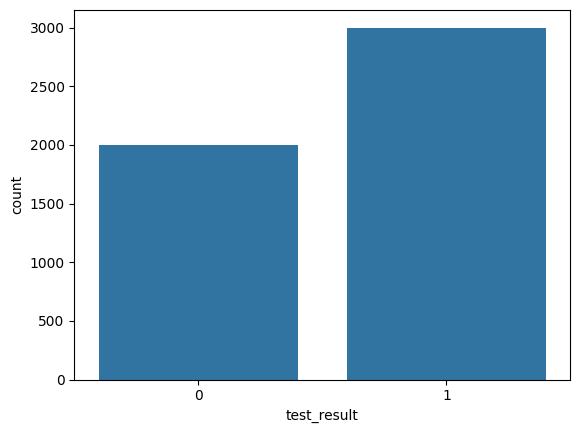

In [9]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

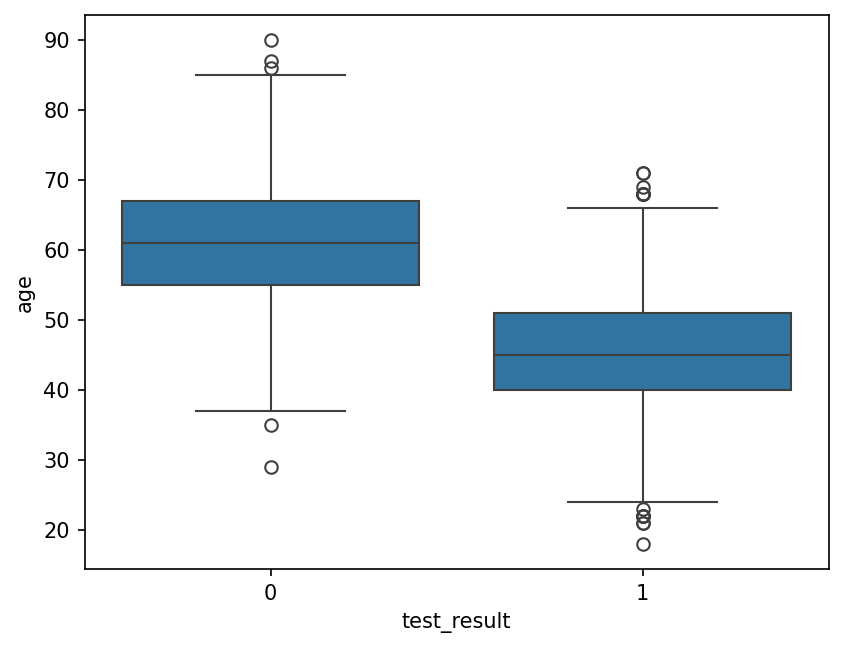

In [12]:
plt.figure(dpi=150)
sns.boxplot(data=df, x='test_result', y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

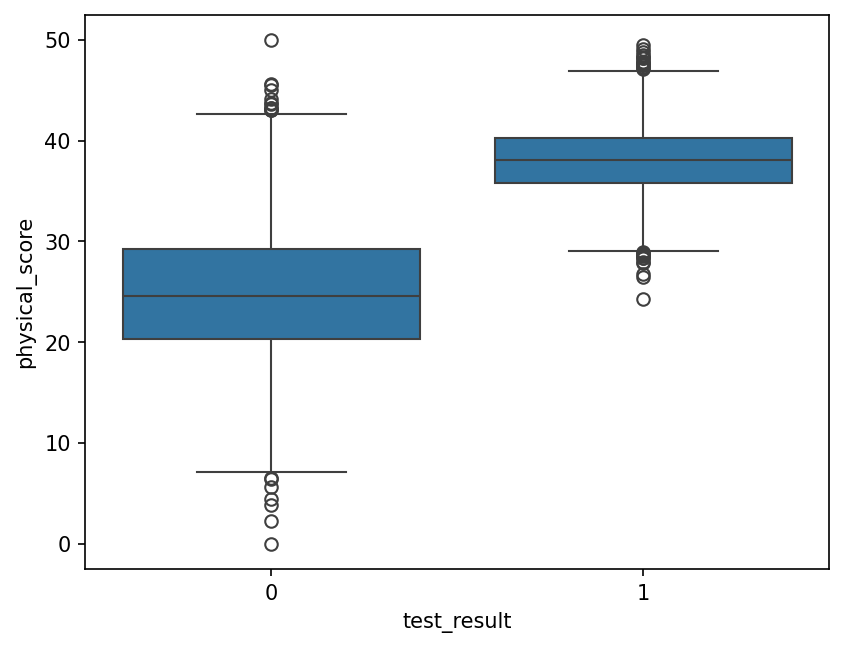

In [16]:
plt.figure(dpi=150)
sns.boxplot(data=df, x='test_result', y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

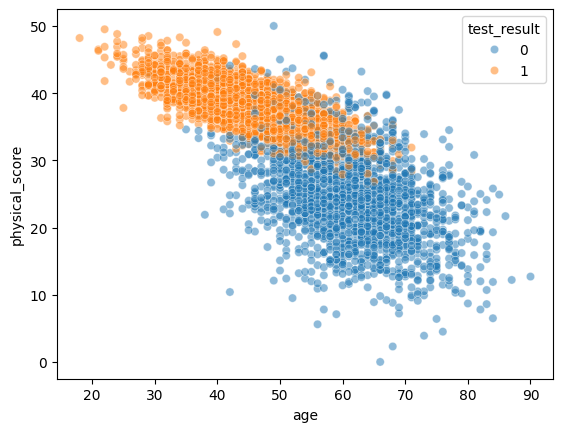

In [19]:
plt.figure(dpi=100)
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5)

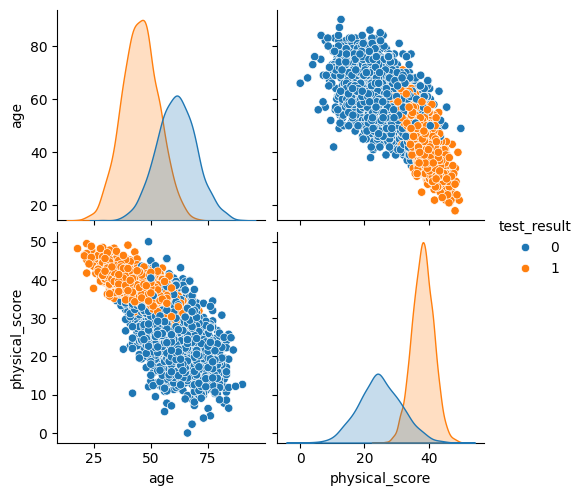

In [20]:
sns.pairplot(df, hue='test_result')

<Axes: >

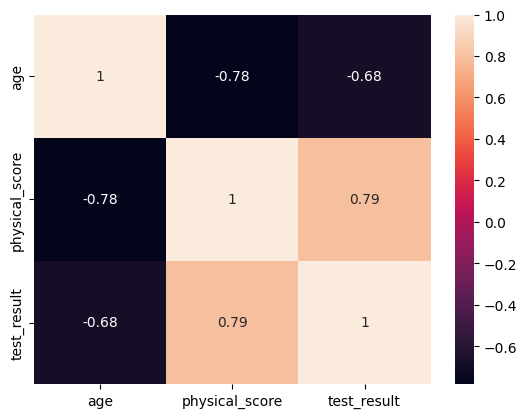

In [21]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

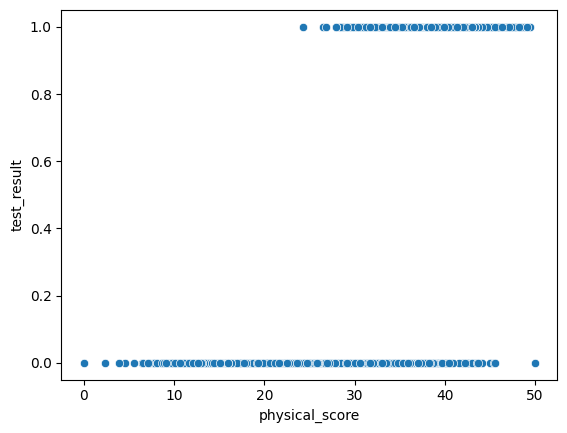

In [22]:
sns.scatterplot(data=df, x='physical_score', y='test_result')

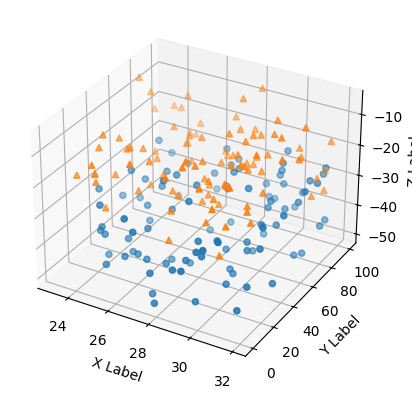

In [23]:
### EXAMPLE ###

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

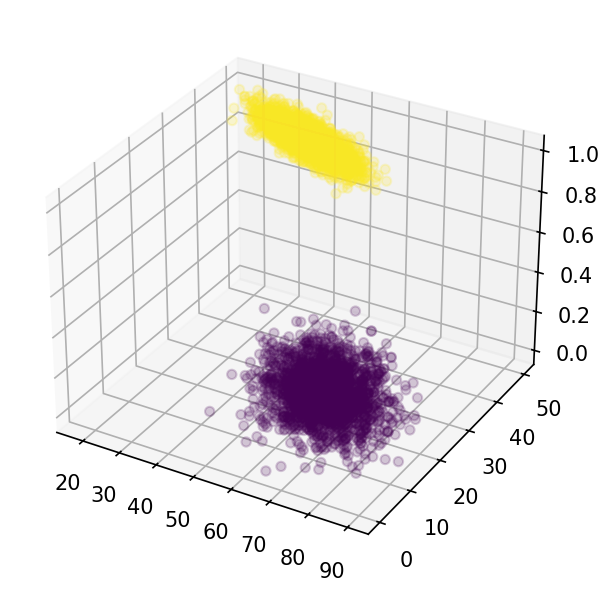

In [32]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'], alpha=0.2)

In [34]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [35]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.preprocessing import StandardScaler

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [106]:
scaler = StandardScaler()

In [107]:
scaled_X_train = scaler.fit_transform(X_train)

In [108]:
scaled_X_test = scaler.transform(X_test)

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [111]:
log_model = LogisticRegression()

In [112]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [113]:
log_model.coef_  # Coefs для age и physical score

array([[-0.95017725,  3.46148946]])

In [114]:
y_pred = log_model.predict(scaled_X_test)

In [115]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [116]:
y_pred_proba = log_model.predict_proba(scaled_X_test)  # predict probability

In [117]:
y_pred_proba  # Вероятности пренадлежности к классу 0 и отдельно к классу 1

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [118]:
# Метрика Recall(чувствительность) полезна для переобученных моделей
# Точность - Precision = (TP)/6

In [119]:
# Среднее гармоническое метрик - F = (2*precision*recall)/(precision+recall) показывает на сколько модель работает хорошо

In [120]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [122]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [123]:
y_pred = log_model.predict(scaled_X_test)

In [124]:
y_pred # 0, 1...

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [125]:
accuracy_score(y_test, y_pred)  # Если есть только age and physical_score, то в 92% случаев модель дает правильные предсказания

0.93

In [126]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay

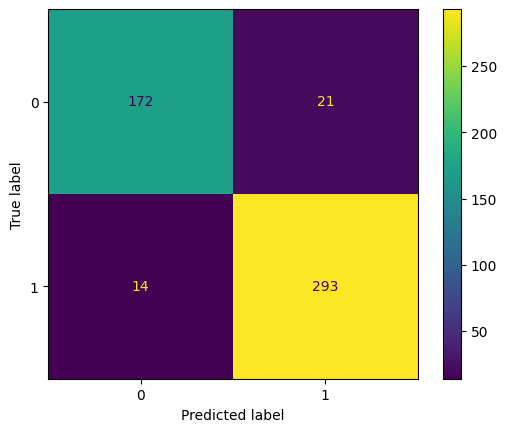

In [128]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [129]:
len(y_test)

500

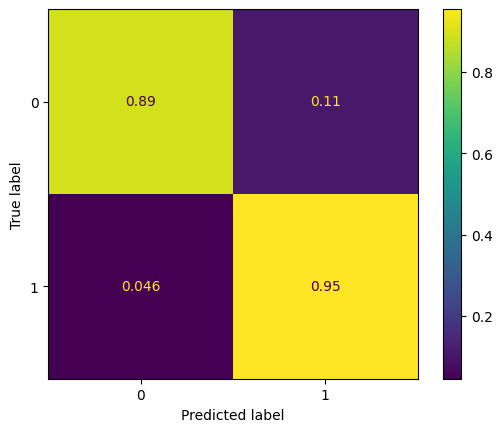

In [130]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize='true')

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [142]:
from sklearn.metrics import precision_score, recall_score

In [143]:
precision_score(y_test, y_pred)  # Общая метрика precision для всей модели

0.9331210191082803

In [144]:
recall_score(y_test, y_pred)

0.9543973941368078

In [152]:
log_model.predict_proba(scaled_X_test)  # Вероятности пренадлежности к классам

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [153]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02380517, 0.97619483])

In [154]:
y_test[0]

1

In [155]:
log_model.predict(scaled_X_test)[0]

1